# Modelo de Machine Learning — Detecção de Anomalias

Neste notebook vamos treinar um modelo simples de **Machine Learning** para identificar leituras anômalas nos sensores (temperatura, vibração e umidade).  
Escolhemos o modelo **Isolation Forest**, que é adequado para detecção de anomalias em dados numéricos.  

O processo será:
1. Carregar o dataset `sensor_readings.csv`.  
2. Selecionar as colunas numéricas.  
3. Treinar o modelo de ML.  
4. Gerar uma nova coluna indicando se cada leitura é normal ou anômala.  
5. Visualizar os resultados em um gráfico de dispersão.  


In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


## Carregando os dados

Aqui vamos carregar o dataset `sensor_readings.csv`, que contém pelo menos 500 leituras por sensor.  
As colunas principais são:  
- **temperatura**  
- **vibracao**  
- **umidade**  


In [6]:
import os

# cria a pasta "data" se não existir
os.makedirs("data", exist_ok=True)

# move o arquivo que você fez upload para dentro da pasta
!mv sensor_readings.csv data/sensor_readings.csv

# agora lê do caminho igual ao repo
df = pd.read_csv("data/sensor_readings.csv")
df.head()



,equipamento,sensor_id,ts,temperatura,vibracao,umidade,tipo,unidade
0,Linha A,1,2025-08-31T06:44:48.165561,26.533456,0.031141,55.349768,temperatura,°C
1,Linha A,1,2025-08-31T06:45:48.165561,25.241825,0.048406,53.835784,temperatura,°C
2,Linha A,1,2025-08-31T06:46:48.165561,25.299756,0.041034,57.646260,temperatura,°C
3,Linha A,1,2025-08-31T06:47:48.165561,24.843054,0.037654,53.706456,temperatura,°C
4,Linha A,1,2025-08-31T06:48:48.165561,26.056922,0.024734,54.344748,temperatura,°C


## Treinando o modelo Isolation Forest

O modelo **Isolation Forest** trabalha isolando pontos que parecem muito diferentes do restante dos dados.  
Configuramos a contaminação (`contamination=0.05`) para indicar que esperamos cerca de **5% de leituras anômalas**.  


In [7]:
# Selecionar apenas as colunas numéricas
X = df[["temperatura", "vibracao", "umidade"]]

# Criar e treinar o modelo
model = IsolationForest(contamination=0.05, random_state=42)
df["anomalia"] = model.fit_predict(X)

# -1 = anômalo, 1 = normal
df["anomalia"].value_counts()


,count
anomalia,
1,1995
-1,105


## Visualização dos resultados

Agora vamos gerar um gráfico de dispersão com duas variáveis (Temperatura e Vibração), colorindo os pontos normais e anômalos.  
Isso permite enxergar onde estão os possíveis problemas.  


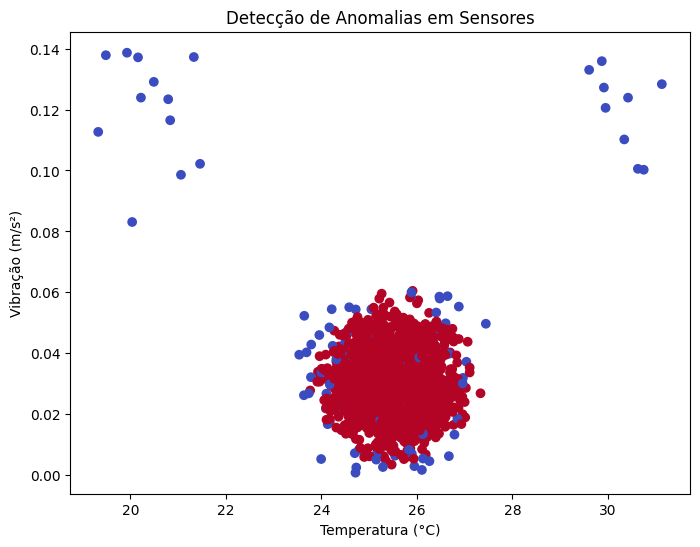

In [8]:
# Plotar gráfico simples
plt.figure(figsize=(8,6))
plt.scatter(df["temperatura"], df["vibracao"], c=df["anomalia"], cmap="coolwarm")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Vibração (m/s²)")
plt.title("Detecção de Anomalias em Sensores")
plt.savefig("anomalias.png")  # salva o gráfico como imagem
plt.show()


## Conclusão

O modelo marcou aproximadamente 5% dos dados como **anomalias**.  
Essas anomalias podem indicar problemas no equipamento, erros de leitura ou situações fora do esperado.  

O gráfico `anomalias.png` foi salvo e pode ser adicionado ao repositório em `notebooks/`.  
